# MNIST image manipulation

This notebook contains some functions for synthesizing data from MNIST dataset.

Let's include all the necessary libs first and read data.

**IMPORTANT**: in this example train/test data are without header row, so we shouldn't skip it.

In [60]:
import numpy as np
import pandas as pd
import random
import scipy.ndimage as nd
import matplotlib.pyplot as plt

IMAGE_SIZE = 28

train_data = pd.read_csv("./data/train.csv", header=None)

Let's start from rotations and shearing (both suggested in ["Handwritten Digit Recognition with a Committee of
Deep Neural Nets on GPUs"](https://arxiv.org/pdf/1103.4487.pdf)).

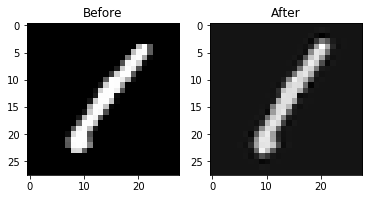

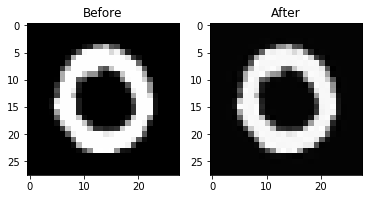

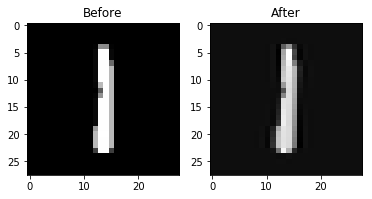

In [56]:
train_data_rotated = []

def show_two_images(X1, X2):
    fig = plt.figure()
    
    sub_plot = fig.add_subplot(1, 2, 1)
    imgplot = plt.imshow(X1)
    sub_plot.set_title('Before')
    
    sub_plot = fig.add_subplot(1, 2, 2)
    imgplot = plt.imshow(X2)
    sub_plot.set_title('After')
    
    plt.show()

for i, row in train_data.iterrows():
    y = row[0]
    X = row[1:].values.reshape(IMAGE_SIZE, IMAGE_SIZE)
    
    angle = np.random.randint(0, 7.5) if y == 1 or y == 7 else np.random.randint(0, 15)        
    angle *= random.choice([-1, 1])
    X_rotated = nd.rotate(X, angle, reshape=False)
    
    if i < 3:
        show_two_images(X, X_rotated)
    
    train_data_rotated.append([y] + np.reshape(X_rotated, IMAGE_SIZE * IMAGE_SIZE))
    
pd.DataFrame(train_data_rotated).to_csv('./data/train_rotated.csv', index=False, header=False)

*TODO*:

* normalize images, remove values like 263 etc, have thresholds like 0 and 1 for example or [-1.0, 1.0]
* add elastic distorted dataset
* add flipped/mirrored dataset ?
* add scaled dataset (10, 12, 14, 16, 18, 20 ...)

Let's shear the images (checkout [PIL Image documentation](http://effbot.org/imagingbook/image.htm) on Affine transformations): 

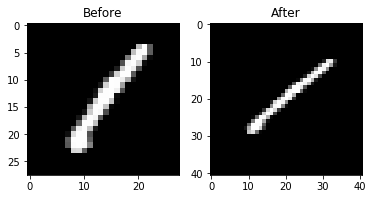

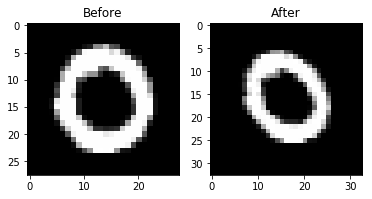

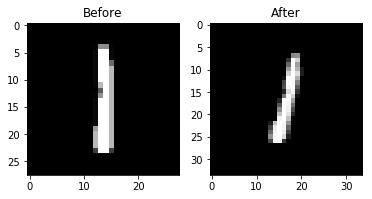

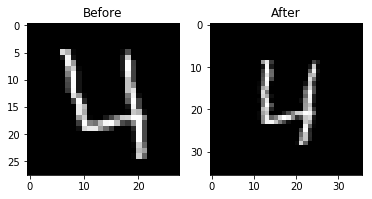

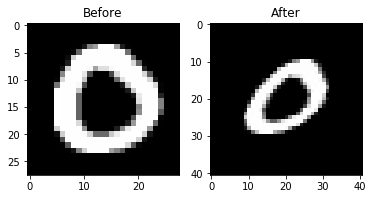

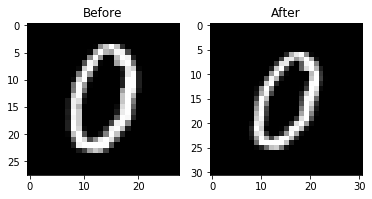

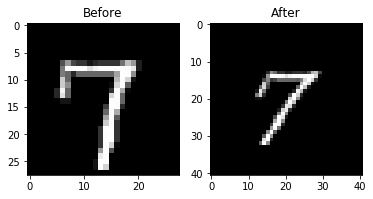

In [ ]:
from PIL import Image

train_data_sheared = []

def square_sheared_image(img, size):
    new_square_size = max(img.size)
    new_square = np.zeros((new_square_size, new_square_size))    
    
    w, h = img.size
    offset = (round((new_square_size - w) / 2), round((new_square_size - h) / 2))
    
    new_square_img = Image.fromarray(np.uint8(new_square))    
    
    new_square_img.paste(img, offset)
    new_square_img.resize((size, size), resample=PIL.Image.BILINEAR)
    
    return new_square_img

for i, row in train_data.iterrows():
    y = row[0]
    X = row[1:].values.reshape(IMAGE_SIZE, IMAGE_SIZE)
        
    X_img = Image.fromarray(np.uint8(X))
    
    m = np.random.ranf() - 0.5
    xshift = abs(m) * IMAGE_SIZE
    new_width = IMAGE_SIZE + int(round(xshift))
    
    X_sheared = X_img.transform((new_width, IMAGE_SIZE), Image.AFFINE, (1, m, -xshift if m > 0 else 0, 0, 1, 0), Image.BICUBIC)
    X_sheared = square_sheared_image(X_sheared, IMAGE_SIZE)
            
    if i < 7:
        show_two_images(X, X_sheared)
        
    train_data_sheared.append([y] + np.reshape(new_square, IMAGE_SIZE * IMAGE_SIZE))
    
pd.DataFrame(train_data_sheared).to_csv('./data/train_sheared.csv', index=False, header=False)